<img src="images/csdms_logo.jpg">

# Using a BMI: Coastline Evolution Model
This example explores how to use a BMI implementation using the CEM model as an example.

## Links
* [CEM source code](https://github.com/csdms/cem-old): Look at the files that have *deltas* in their name.
* [CEM description on CSDMS](http://csdms.colorado.edu/wiki/Model_help:CEM): Detailed information on the CEM model.

Some magic that allows us to view images within the notebook.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from csdms.Cem import Cem
cem = Cem()

In [3]:
cem.get_output_var_names()[1]

array(['basin_outlet~coastal_center__x_coordinate',
       'basin_outlet~coastal_water_sediment~bedload__mass_flow_rate',
       'land_surface__elevation', 'sea_water__depth',
       'basin_outlet~coastal_center__y_coordinate'], dtype=object)

In [4]:
cem.get_input_var_names()[1]

array(['sea_surface_water_wave__azimuth_angle_of_opposite_of_phase_velocity',
       'basin_outlet_water_sediment~bedload__mass_flow_rate',
       'land_surface_water_sediment~bedload__mass_flow_rate',
       'sea_surface_water_wave__period',
       'basin_outlet_water_sediment~suspended__mass_flow_rate',
       'sea_surface_water_wave__height'], dtype=object)

In [5]:
angle_name = 'sea_surface_water_wave__azimuth_angle_of_opposite_of_phase_velocity'

print "Data type: %s" % cem.get_var_type(angle_name)[1]
print "Units: %s" % cem.get_var_units(angle_name)[1]
print "Grid id: %d" % cem.get_var_grid(angle_name)[1]
print "Number of elements in grid: %d" % cem.get_grid_size(0)[1]
print "Type of grid: %s" % cem.get_grid_type(0)[1]

Data type: double
Units: radians
Grid id: 0
Number of elements in grid: 1
Type of grid: scalar


In [6]:
cem.initialize(None)

0

In [7]:
import numpy as np

cem.set_value(angle_name, np.array((0.1, )))
cem.set_value("sea_surface_water_wave__height", np.array((2., )))
cem.set_value("sea_surface_water_wave__period", np.array((7., )))

0

In [8]:
grid_id = cem.get_var_grid('sea_water__depth')[1]

In [9]:
grid_type = cem.get_grid_type(grid_id)[1]
grid_rank = cem.get_grid_rank(grid_id)[1]
print 'Type of grid: %s (%dD)' % (grid_type, grid_rank)

Type of grid: uniform_rectilinear (2D)


In [10]:
shape = np.empty((grid_rank, ), dtype='int32')
spacing = np.empty((grid_rank, ), dtype=float)

cem.get_grid_shape(grid_id, shape)
cem.get_grid_spacing(grid_id, spacing)

print 'The grid has %d rows and %d columns' % (shape[0], shape[1])
print 'The spacing between rows is %f and between columns is %f' % (spacing[0], spacing[1])

The grid has 60 rows and 100 columns
The spacing between rows is 100.000000 and between columns is 100.000000


In [11]:
z = np.empty(shape, dtype=float)
cem.get_value('sea_water__depth', z)

0

In [12]:
def plot_coast(spacing, z):
    xmin, xmax = 0., z.shape[1] * spacing[0] * 1e-3
    ymin, ymax = 0., z.shape[0] * spacing[1] * 1e-3

    imshow(z, extent=[xmin, xmax, ymin, ymax], origin='lower', cmap='ocean')
    colorbar().ax.set_ylabel('Water Depth (m)')
    xlabel('Along shore (km)')
    ylabel('Cross shore (km)')

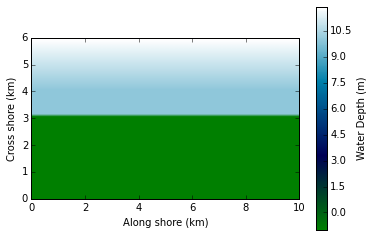

In [13]:
plot_coast(spacing, z)

In [14]:
water_depth = z[:, 50]
river_mouth = np.where(water_depth > 0.)[0][0]
river_mouth

31

In [15]:
qs = np.zeros_like(z)
qs[river_mouth, 50] = 2000

In [16]:
cem.set_value('land_surface_water_sediment~bedload__mass_flow_rate', qs.flatten())

0

In [17]:
cem.update(250.)
cem.get_value('sea_water__depth', z)

0

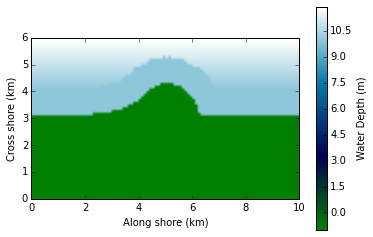

In [18]:
plot_coast(spacing, z)

In [19]:
qs[river_mouth, 75] = 1000
cem.set_value('land_surface_water_sediment~bedload__mass_flow_rate', qs.flatten())

cem.update(500.)
cem.get_value('sea_water__depth', z)

0

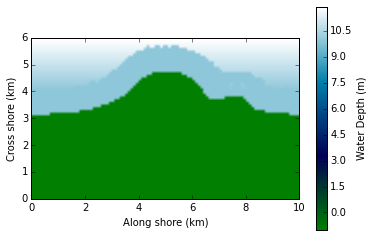

In [20]:
plot_coast(spacing, z)

In [21]:
qs.fill(0.)
qs[river_mouth, (25, 75)] = 1000
cem.set_value('land_surface_water_sediment~bedload__mass_flow_rate', qs.flatten())

cem.update(740.)
cem.get_value('sea_water__depth', z)

0

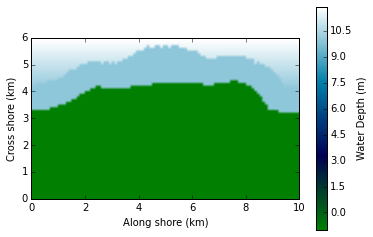

In [22]:
plot_coast(spacing, z)

In [23]:
qs.fill(0.)
cem.set_value('land_surface_water_sediment~bedload__mass_flow_rate', qs.flatten())
cem.update(2000)
cem.get_value('sea_water__depth', z)

0

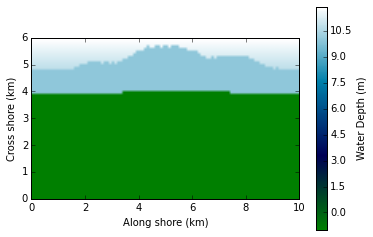

In [24]:
plot_coast(spacing, z)

In [25]:
qs.fill(0.)
qs[river_mouth, (25, 75)] = 1000
cem.set_value('land_surface_water_sediment~bedload__mass_flow_rate', qs.flatten())

cem.update(2250)
cem.get_value('sea_water__depth', z)

0

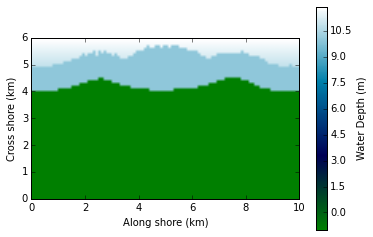

In [26]:
plot_coast(spacing, z)